<a href="https://colab.research.google.com/github/aswink71/Time-Series-Project/blob/main/Multivaiate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
!pip install statsmodels

In [143]:
# importation technique to compute the information.
import numpy as nmy
#applying the library for manupulated the data-set
import pandas as pdns

# Data Visualization
import matplotlib.pyplot as matlp
# here we use the sea born libraries for draw the graph
import seaborn as sns
# use this library for this project
from statsmodels.tsa.stattools import adfuller, acf, pacf
# apply the method of that
import statsmodels.api as sm

# For cross-validation, specifically with time series data,
from sklearn.model_selection import train_test_split,TimeSeriesSplit

# Metrics to evaluate how well models perform
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# using the lyers in the algorithms
from keras.models import Sequential
# Utilize the algorithms with the lyes.
from keras.layers import Dense,Dropout

# Progress Tracking
from tqdm import tqdm

# removing the causility
import warnings
warnings.filterwarnings("ignore")

# adding this method for timing
from datetime import datetime

In [144]:
def read_data(file_path):
    data = pdns.read_csv(file_path)
    return data

In [145]:
STC_DTA=read_data('/content/drive/MyDrive/Time series project/STC 7010 Historical Data (2).csv')
MOB_DTA=read_data('/content/drive/MyDrive/Time series project/MOBILY 7020 Historical Data (2).csv')
ZAIN_DTA=read_data('/content/drive/MyDrive/Time series project/ZAIN KSA 7030 Historical Data (2).csv')

In [146]:
STC_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,37.95,37.80,37.95,37.60,1.90M,0.40%
1,11/20/2022,37.80,37.85,37.85,37.60,1.82M,0.40%
2,11/17/2022,37.65,38.00,38.05,37.65,3.20M,-0.92%
3,11/16/2022,38.00,37.80,38.00,37.15,3.44M,0.53%
4,11/15/2022,37.80,38.30,38.30,37.50,4.75M,-1.31%


In [147]:
MOB_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,35.65,35.20,35.65,34.85,540.30K,-0.56%
1,11/20/2022,35.85,36.50,36.50,35.20,385.81K,-1.65%
2,11/17/2022,36.45,35.85,36.50,35.55,459.02K,0.97%
3,11/16/2022,36.10,35.00,36.50,35.00,474.77K,3.14%
4,11/15/2022,35.00,35.80,36.00,34.95,633.20K,-2.78%


In [148]:
ZAIN_DTA.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/21/2022,11.40,11.42,11.50,11.30,1.75M,-0.87%
1,11/20/2022,11.50,11.50,11.52,11.38,1.24M,-0.17%
2,11/17/2022,11.52,11.48,11.54,11.36,1.39M,0.35%
3,11/16/2022,11.48,11.34,11.52,11.24,1.98M,0.88%
4,11/15/2022,11.38,11.26,11.38,11.18,2.29M,1.25%


In [149]:
STC_DTA.shape

(1471, 7)

In [150]:
STC_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1471 non-null   object 
 1   Price     1471 non-null   float64
 2   Open      1471 non-null   float64
 3   High      1471 non-null   float64
 4   Low       1471 non-null   float64
 5   Vol.      1471 non-null   object 
 6   Change %  1471 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.6+ KB


In [151]:
MOB_DTA.shape

(1471, 7)

In [152]:
MOB_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1471 non-null   object 
 1   Price     1471 non-null   float64
 2   Open      1471 non-null   float64
 3   High      1471 non-null   float64
 4   Low       1471 non-null   float64
 5   Vol.      1471 non-null   object 
 6   Change %  1471 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.6+ KB


In [153]:
ZAIN_DTA.shape

(1469, 7)

In [154]:
ZAIN_DTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1469 non-null   object 
 1   Price     1469 non-null   float64
 2   Open      1469 non-null   float64
 3   High      1469 non-null   float64
 4   Low       1469 non-null   float64
 5   Vol.      1469 non-null   object 
 6   Change %  1469 non-null   object 
dtypes: float64(4), object(3)
memory usage: 80.5+ KB


In [155]:
print(STC_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [156]:
print(MOB_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [157]:
print(ZAIN_DTA.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [158]:
print("STC_DTA Duplicate Rows:", STC_DTA.duplicated().sum())

STC_DTA Duplicate Rows: 0


In [159]:
print("ZAIN_DTA Duplicate Rows:", ZAIN_DTA.duplicated().sum())

ZAIN_DTA Duplicate Rows: 0


In [160]:
print("MOB_DTA Duplicate Rows:", MOB_DTA.duplicated().sum())

MOB_DTA Duplicate Rows: 0


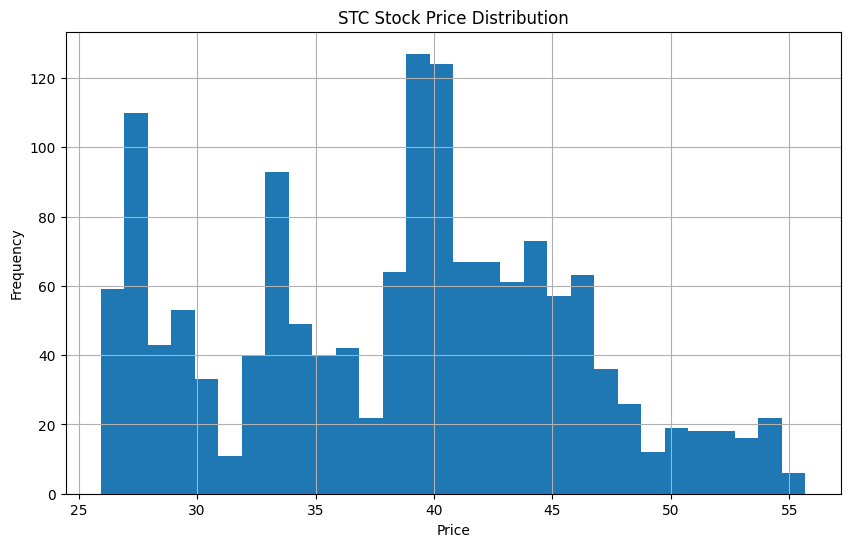

In [161]:
# Price Distribution (Histogram)
matlp.figure(figsize=(10, 6))
matlp.hist(STC_DTA['Price'], bins=30)
matlp.xlabel('Price')
matlp.ylabel('Frequency')
matlp.title('STC Stock Price Distribution')
matlp.grid(True)
matlp.show()

In [162]:
!pip install PyWavelets

In [163]:
STC_DTA['Date'] = pdns.to_datetime(STC_DTA['Date'])
MOB_DTA['Date'] = pdns.to_datetime(MOB_DTA['Date'])
ZAIN_DTA['Date'] = pdns.to_datetime(ZAIN_DTA['Date'])

In [164]:
STC_DTA = STC_DTA.set_index('Date')
MOB_DTA = MOB_DTA.set_index('Date')
ZAIN_DTA = ZAIN_DTA.set_index('Date')

In [165]:
STC_DTA.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-11-21,37.95,37.80,37.95,37.60,1.90M,0.40%
2022-11-20,37.80,37.85,37.85,37.60,1.82M,0.40%
2022-11-17,37.65,38.00,38.05,37.65,3.20M,-0.92%
2022-11-16,38.00,37.80,38.00,37.15,3.44M,0.53%
2022-11-15,37.80,38.30,38.30,37.50,4.75M,-1.31%


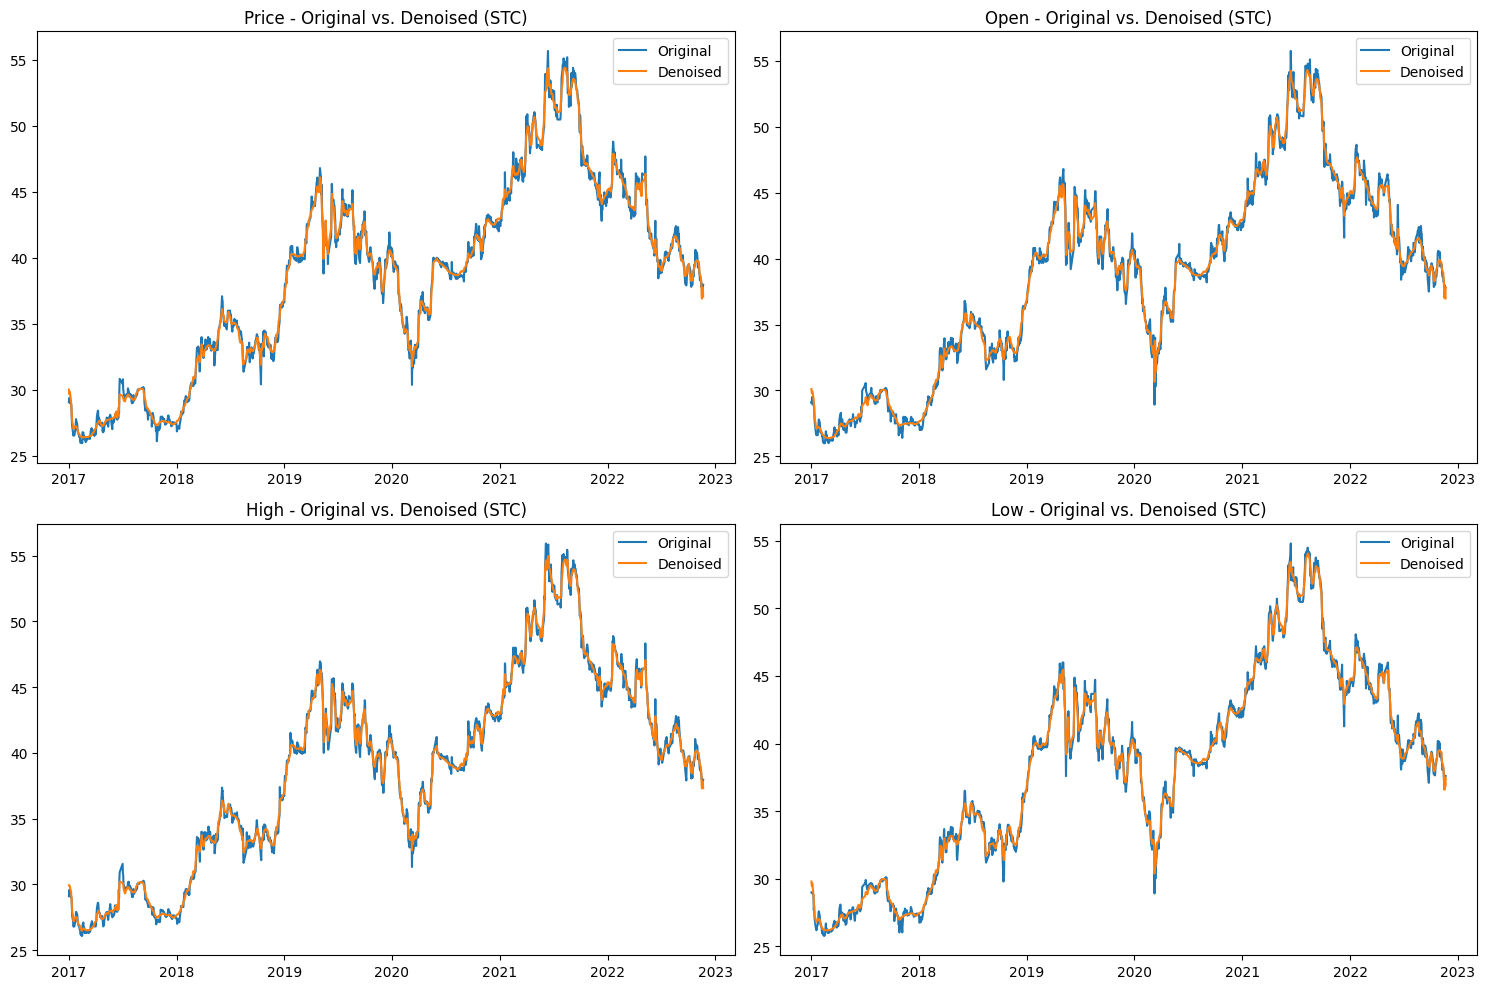

In [166]:
import pywt
# defining the method with the parameters
def wavelet_denoise(data,wavelet='db4',level=1):
    # Perform a discrete wavelet transform (DWT) on the input
    coeff=pywt.wavedec(data, wavelet, mode="per")
    # Estimate the noise standard deviation (sigma) based on the median absolute deviation
    sigma=nmy.median(nmy.abs(coeff[-level])) / 0.6745
    # Determine the denoising universal threshold (uthresh).
    uthresh=sigma * nmy.sqrt(2 * nmy.log(len(data)))
    coeff[1:]=(pywt.threshold(i, value=uthresh,mode='soft') for i in coeff[1:])
    denoised_data=pywt.waverec(coeff,wavelet,mode='per') #reconstruct

    # Ensure the length of denoised data matches the original data
    denoised_data=denoised_data[:len(data)]

    return denoised_data

columns_to_denoise=['Price', 'Open', 'High', 'Low']

for column in columns_to_denoise:
    STC_DTA[column + '_denoised'] = wavelet_denoise(STC_DTA[column])

# ploting the figuresize of the graph
matlp.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_denoise):
    matlp.subplot(2, 2, i + 1)
    matlp.plot(STC_DTA[column], label='Original')
    matlp.plot(STC_DTA[column + '_denoised'], label='Denoised')
    matlp.title(f'{column} - Original vs. Denoised (STC)')
    matlp.legend()

matlp.tight_layout()
matlp.show()

In [167]:
STC_DTA_denoised = STC_DTA[['Price_denoised', 'Open_denoised', 'High_denoised', 'Low_denoised']]
STC_DTA_denoised.head()

,Price_denoised,Open_denoised,High_denoised,Low_denoised
Date,,,,
2022-11-21,37.053640,36.980651,37.309299,36.886020
2022-11-20,37.691529,37.841816,37.813996,37.498794
2022-11-17,36.898001,37.008325,37.305139,36.585402
2022-11-16,37.089451,37.292800,37.520129,36.726699
2022-11-15,37.991226,38.267649,38.393143,37.621042


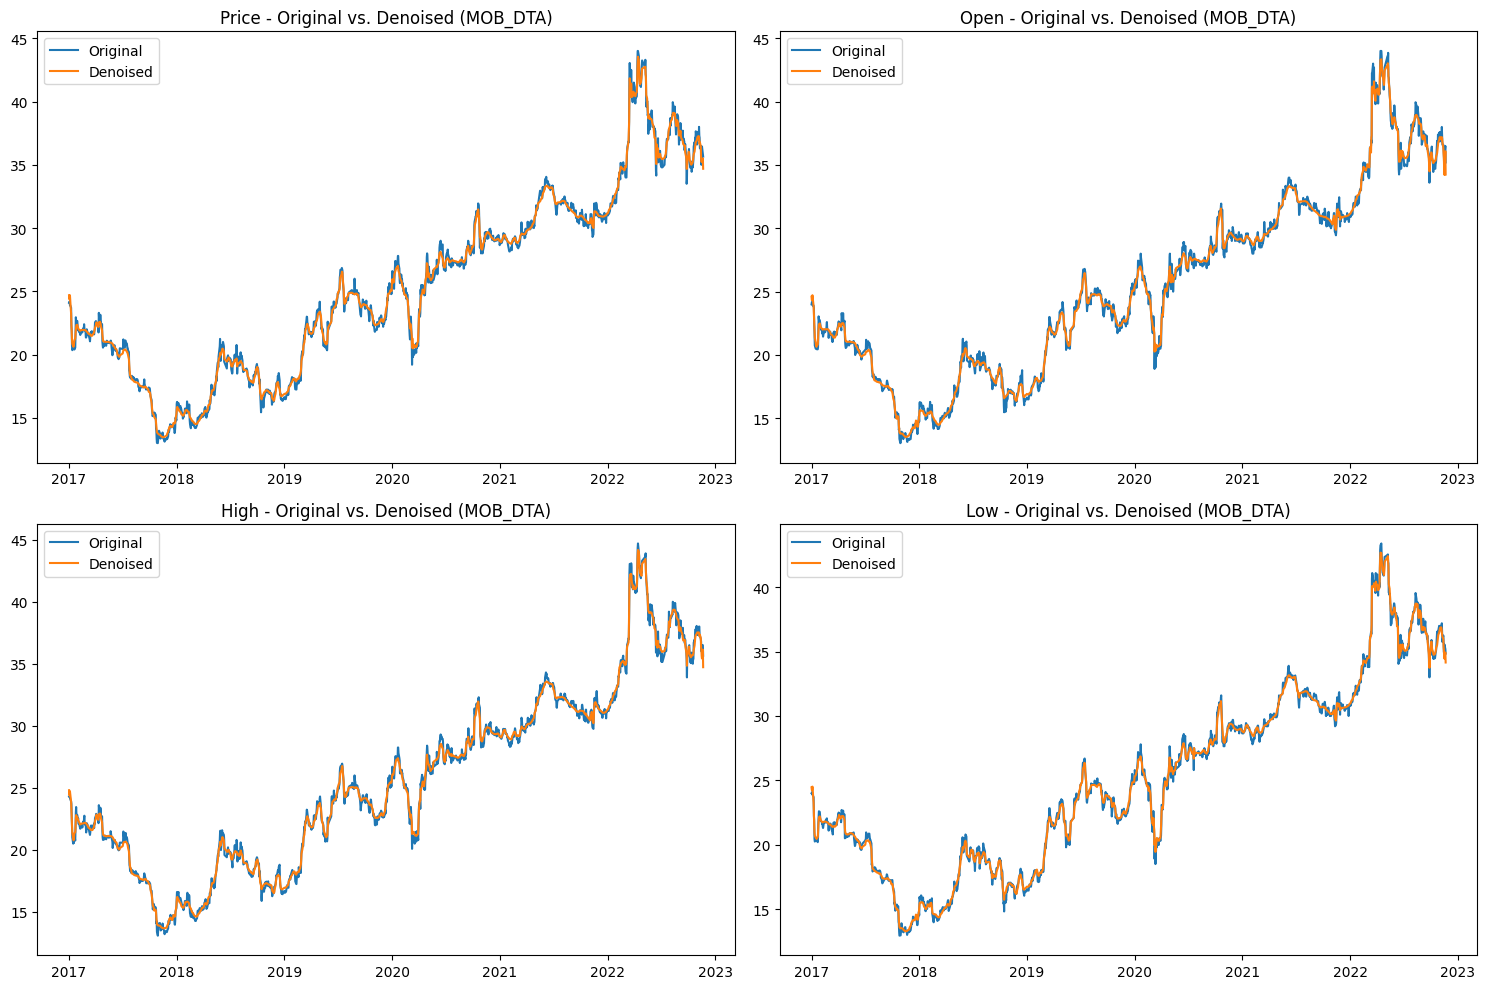

In [168]:
# Apply wavelet denoising to MOB_DTA
for column in columns_to_denoise:
    MOB_DTA[column + '_denoised'] = wavelet_denoise(MOB_DTA[column])

# Create a new DataFrame with denoised data for MOB_DTA
MOB_DTA_denoised = MOB_DTA[['Price_denoised', 'Open_denoised', 'High_denoised', 'Low_denoised']]

matlp.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_denoise):
    matlp.subplot(2, 2, i + 1)
    matlp.plot(MOB_DTA[column], label='Original')
    matlp.plot(MOB_DTA[column + '_denoised'], label='Denoised')
    matlp.title(f'{column} - Original vs. Denoised (MOB_DTA)')
    matlp.legend()

matlp.tight_layout()
matlp.show()

In [169]:
MOB_DTA_denoised.head()

,Price_denoised,Open_denoised,High_denoised,Low_denoised
Date,,,,
2022-11-21,34.687296,34.246584,34.723126,34.154094
2022-11-20,35.508795,36.083377,36.138736,34.931463
2022-11-17,35.289232,34.215036,35.426941,34.447009
2022-11-16,35.229645,34.514306,35.626972,34.557422
2022-11-15,35.257313,35.569238,36.057010,35.111255


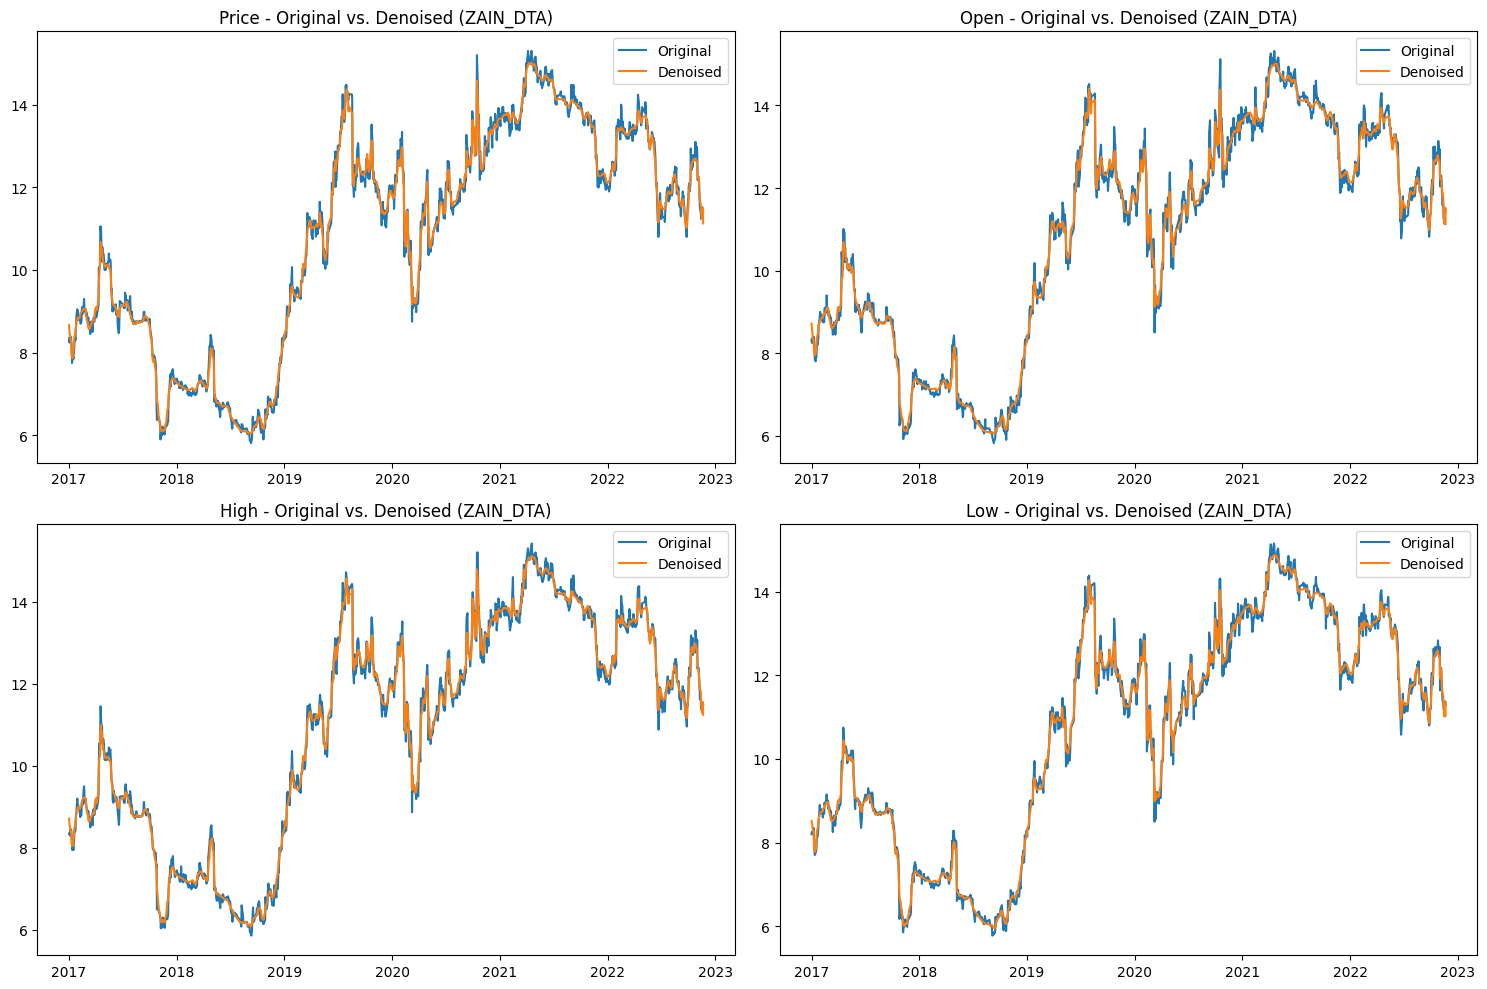

In [170]:
# Apply wavelet denoising to ZAIN_DTA
for column in columns_to_denoise:
    ZAIN_DTA[column + '_denoised'] = wavelet_denoise(ZAIN_DTA[column])

# Create a new DataFrame with denoised data for ZAIN_DTA
ZAIN_DTA_denoised = ZAIN_DTA[['Price_denoised', 'Open_denoised', 'High_denoised', 'Low_denoised']]

matlp.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_denoise):
    matlp.subplot(2, 2, i + 1)
    matlp.plot(ZAIN_DTA[column], label='Original')
    matlp.plot(ZAIN_DTA[column + '_denoised'], label='Denoised')
    matlp.title(f'{column} - Original vs. Denoised (ZAIN_DTA)')
    matlp.legend()

matlp.tight_layout()
matlp.show()

In [171]:
ZAIN_DTA_denoised.head()

,Price_denoised,Open_denoised,High_denoised,Low_denoised
Date,,,,
2022-11-21,11.126366,11.126719,11.242727,11.032671
2022-11-20,11.506569,11.520320,11.556474,11.355438
2022-11-17,11.236368,11.127045,11.297395,11.016776
2022-11-16,11.262502,11.147668,11.323279,11.032582
2022-11-15,11.373663,11.315599,11.479557,11.203742


<Figure size 1200x600 with 0 Axes>

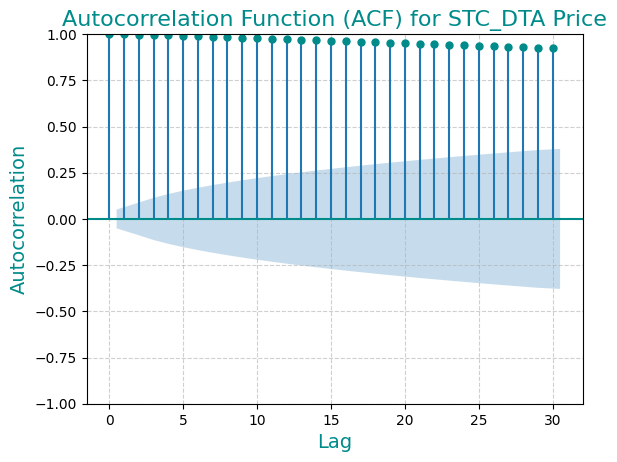

<Figure size 1200x600 with 0 Axes>

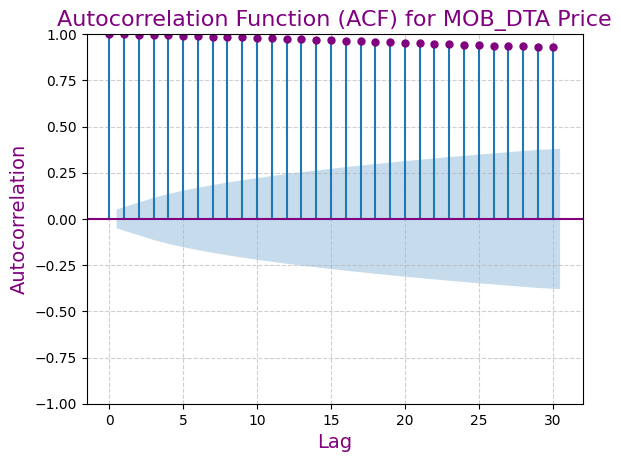

<Figure size 1200x600 with 0 Axes>

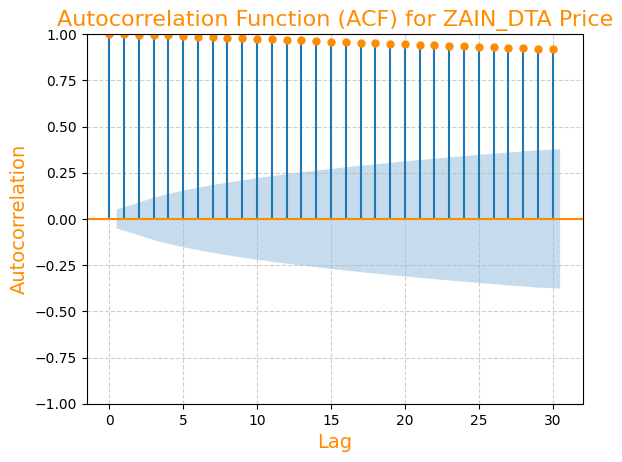

In [172]:
# Define a custom function to plot ACF with customized colors and styling
def plot_acf_custom(data, title, color, lags=30):
    matlp.figure(figsize=(12, 6))

    #Graph the ACF using a selected hue.
    sm.graphics.tsa.plot_acf(data,lags=lags,color=color)

    # Customizing the title and labels with color and style
    matlp.title(f'Autocorrelation Function (ACF) for {title} Price', fontsize=16, color=color)
    matlp.xlabel('Lag', fontsize=14, color=color)
    matlp.ylabel('Autocorrelation', fontsize=14, color=color)

    #Including a grid to improve readability
    matlp.grid(True, linestyle='--', alpha=0.6)

    # Showing the plot
    matlp.show()

# Plot ACF for STC_DTA with a specific color scheme
plot_acf_custom(STC_DTA_denoised['Price_denoised'], 'STC_DTA', color='darkcyan')

# Plot ACF for MOB_DTA with a specific color scheme
plot_acf_custom(MOB_DTA_denoised['Price_denoised'], 'MOB_DTA', color='purple')

# Plot ACF for ZAIN_DTA with a specific color scheme
plot_acf_custom(ZAIN_DTA_denoised['Price_denoised'], 'ZAIN_DTA', color='darkorange')

<Figure size 1200x600 with 0 Axes>

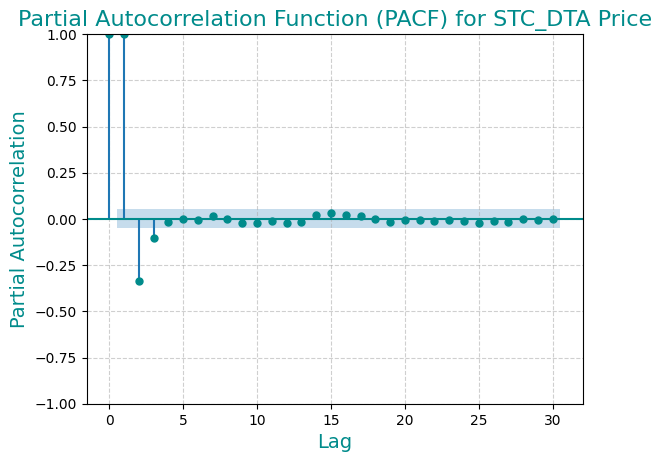

<Figure size 1200x600 with 0 Axes>

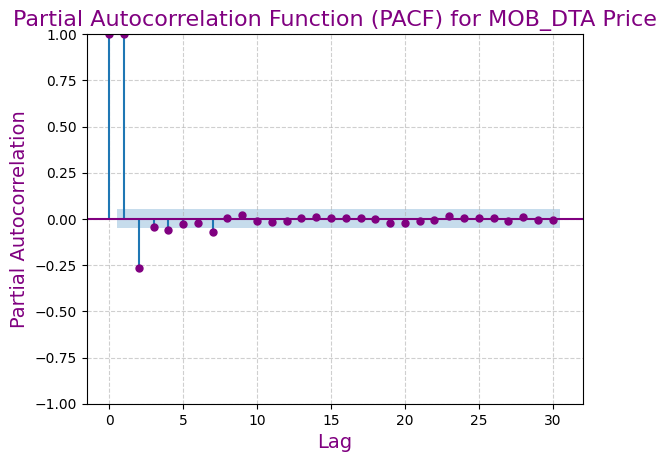

<Figure size 1200x600 with 0 Axes>

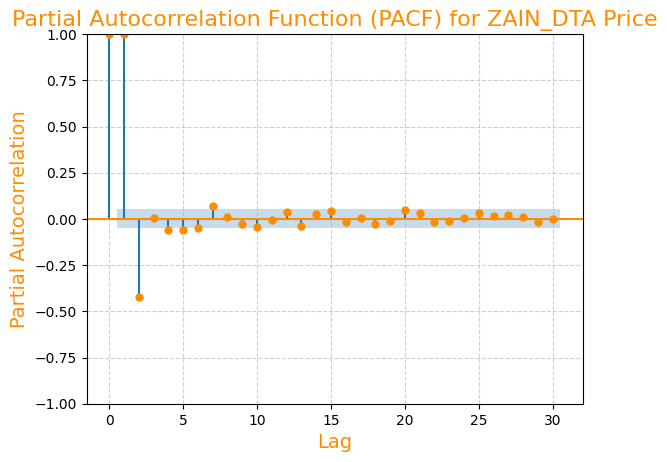

In [173]:
# Define a custom function to plot PACF with customized colors and styling
def plot_pacf_custom(data, title, color, lags=30):
    matlp.figure(figsize=(12, 6))

    # Plot the PACF with a chosen color
    sm.graphics.tsa.plot_pacf(data, lags=lags, color=color)

    # Customizing the title and labels with color and style
    matlp.title(f'Partial Autocorrelation Function (PACF) for {title} Price', fontsize=16, color=color)
    matlp.xlabel('Lag', fontsize=14, color=color)
    matlp.ylabel('Partial Autocorrelation', fontsize=14, color=color)

    # Including a grid to make it easier to read
    matlp.grid(True, linestyle='--', alpha=0.6)

    #displaying the plot
    matlp.show()

# Plot PACF for STC_DTA with a specific color scheme
plot_pacf_custom(STC_DTA_denoised['Price_denoised'], 'STC_DTA', color='darkcyan')

# Plot PACF for MOB_DTA with a specific color scheme
plot_pacf_custom(MOB_DTA_denoised['Price_denoised'], 'MOB_DTA', color='purple')

# Plot PACF for ZAIN_DTA with a specific color scheme
plot_pacf_custom(ZAIN_DTA_denoised['Price_denoised'], 'ZAIN_DTA', color='darkorange')

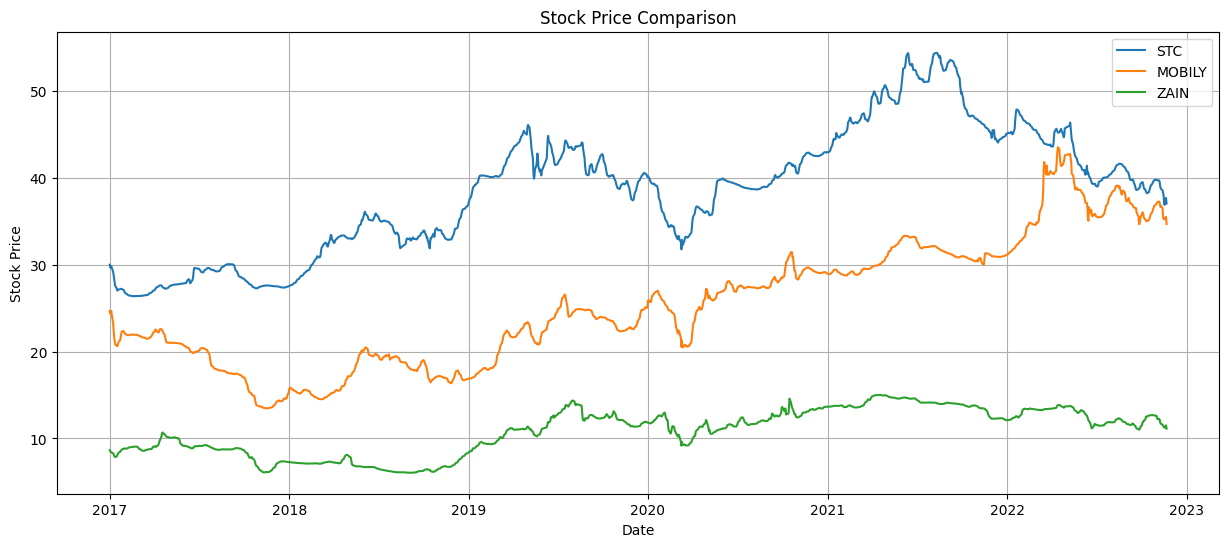

In [174]:
matlp.figure(figsize=(15, 6))
matlp.plot(STC_DTA_denoised['Price_denoised'], label='STC')
matlp.plot(MOB_DTA_denoised['Price_denoised'], label='MOBILY')
matlp.plot(ZAIN_DTA_denoised['Price_denoised'], label='ZAIN')
matlp.xlabel('Date')
matlp.ylabel('Stock Price')
matlp.title('Stock Price Comparison')
matlp.legend()
matlp.grid(True)
matlp.show()

# Standard Scalling

In [175]:
from sklearn.preprocessing import StandardScaler
# Select relevant columns for multivariate analysis
STC_multivariate = STC_DTA_denoised[['Open_denoised', 'High_denoised', 'Low_denoised','Price_denoised']]

# Scale the 'Open', 'High', 'Low' columns using Standard Scalling
scaler_multivariate = StandardScaler()

# Apply fit_transform on the scaler_multivariate object
scaled_data = scaler_multivariate.fit_transform(STC_multivariate[['Open_denoised', 'High_denoised', 'Low_denoised','Price_denoised']])

# Assign the scaled data to the new columns in STC_multivariate
STC_multivariate[['Open_denoised', 'High_denoised', 'Low_denoised','Price_denoised']] = scaled_data

In [176]:
# Check if the DataFrame was scaled correctly
print(STC_multivariate.head())

            Open_denoised  High_denoised  Low_denoised  Price_denoised
Date                                                                  
2022-11-21      -0.219842      -0.216675     -0.187703       -0.209128
2022-11-20      -0.100148      -0.147307     -0.101551       -0.120291
2022-11-17      -0.215996      -0.217247     -0.229967       -0.230804
2022-11-16      -0.176456      -0.187698     -0.210102       -0.204141
2022-11-15      -0.040961      -0.067706     -0.084364       -0.078553


In [177]:
# Select relevant columns for multivariate analysis for MOB_DTA and ZAIN_DTA
MOB_multivariate=MOB_DTA_denoised[['Open_denoised','High_denoised','Low_denoised','Price_denoised']]
ZAIN_multivariate=ZAIN_DTA_denoised[['Open_denoised','High_denoised','Low_denoised','Price_denoised']]


# Apply StandardScaler to MOB_multivariate
scaled_data_MOB =scaler_multivariate.fit_transform(MOB_multivariate[['Open_denoised','High_denoised','Low_denoised','Price_denoised']])
MOB_multivariate[['Open_denoised','High_denoised','Low_denoised','Price_denoised']] =scaled_data_MOB

# Apply StandardScaler to ZAIN_multivariate
scaled_data_ZAIN =scaler_multivariate.fit_transform(ZAIN_multivariate[['Open_denoised','High_denoised','Low_denoised','Price_denoised']])
ZAIN_multivariate[['Open_denoised','High_denoised','Low_denoised','Price_denoised']] =scaled_data_ZAIN

# Check if the DataFrames were scaled correctly
print(MOB_multivariate.head())

            Open_denoised  High_denoised  Low_denoised  Price_denoised
Date                                                                  
2022-11-21       1.251805       1.266364      1.289421        1.313754
2022-11-20       1.508951       1.462440      1.399361        1.428780
2022-11-17       1.247388       1.363849      1.330847        1.398037
2022-11-16       1.289285       1.391556      1.346462        1.389694
2022-11-15       1.436973       1.451121      1.424788        1.393568


In [178]:
print(ZAIN_multivariate.head())

            Open_denoised  High_denoised  Low_denoised  Price_denoised
Date                                                                  
2022-11-21       0.109634       0.105793      0.120764        0.109201
2022-11-20       0.259711       0.224510      0.244986        0.253993
2022-11-17       0.109759       0.126479      0.114646        0.151093
2022-11-16       0.117622       0.136273      0.120729        0.161045
2022-11-15       0.181653       0.195406      0.186603        0.203378


In [179]:
# To compute and output different regression performance metrics, define a function.
def calculate_metrics(y_true, y_pred):
  # calculating the values of errors with the data
  mse=mean_squared_error(y_true,y_pred)
  #find out the (RMSE) by taking the square root of MSE
  rmse=nmy.sqrt(mse)
  # Determining the actual and anticipated values
  mae=mean_absolute_error(y_true, y_pred)
  # To determine the Percentage Error
  r2=r2_score(y_true, y_pred)
  # To calculate the averagerror
  def mean_absolute_percentage_error(y_true,y_pred):
      # Converting and to numpy arrays if they are not already
      y_true,y_pred=nmy.array(y_true),nmy.array(y_pred)
      # returning the values of data
      return nmy.mean(nmy.abs((y_true - y_pred) / y_true))
  # evaluting the valeus with the data
  mape=mean_absolute_percentage_error(y_true,y_pred)
  # showing the values of this result
  print("Mean Absolute Error (MAE):",mae)
  # evaluting the score with the values
  print("Mean Squared Error (MSE):",mse)
  # finding the values of result with the models
  print("Root Mean Squared Error (RMSE):",rmse)
  # getting the score with the tested data
  print("Mean Absolute Percentage Error (MAPE):",mape)
  print("R-squared (R2):",r2)

# STC Dataset

In [180]:
#function to flatten the data in preparation for random forest
def reshape_data(data,time_steps=20):
    X, y = [], []
    #Fixed the indexing issue
    for i in range(len(data) - time_steps -1):
        # Select the first column (Price_scaled)
        X.append(data[i:(i + time_steps), 0])
         # Select the first column (Price_scaled)
        y.append(data[i + time_steps, 0])
    # returning the values with array
    return nmy.array(X),nmy.array(y)

STC_multivariate_values=STC_multivariate.values

# Reshape the data (adjust the time_steps as needed)
time_steps = 20
X, y = reshape_data(STC_multivariate_values, time_steps=time_steps)

# X.shape will be (number of samples, time_steps, number of features)
print("Reshaped X:", X.shape)
print("Reshaped y:", y.shape)

Reshaped X: (1450, 20)
Reshaped y: (1450,)


In [181]:
# This ensures that the last 14 data points will be used as the test set
train_size_stc = len(X) - 14
# Separating the feature data X into sets for testing and training
X_train_stc,X_test_stc=X[:train_size_stc],X[train_size_stc:]
# The training and test sets are separated out of the feature data X
y_train_stc,y_test_stc=y[:train_size_stc],y[train_size_stc:]

In [182]:
print("X_train_stc shape:",X_train_stc.shape)
print("X_test_stc shape:",X_test_stc.shape)
print("y_train_stc shape:",y_train_stc.shape)
print("y_test_stc shape:",y_test_stc.shape)

X_train_stc shape: (1436, 20)
X_test_stc shape: (14, 20)
y_train_stc shape: (1436,)
y_test_stc shape: (14,)


# Random Forest Regression

In [183]:
# use the algorithms with the suitabel parameter
from sklearn.ensemble import RandomForestRegressor
# getting the score of the models
from sklearn.metrics import r2_score,mean_squared_error

# Setting up optimized hyper-parameters for the algorithms
rf_model = RandomForestRegressor(n_estimators=200,max_depth=7,min_samples_split=2,min_samples_leaf=2,random_state=2)

# using the trained infromation to the model
rf_model.fit(X_train_stc, y_train_stc)

# Make forecasts using the test set.
prd_rf_stc_tst=rf_model.predict(X_test_stc)
# calculating the prediction with the algorithms
pd_rf_stc_trn=rf_model.predict(X_train_stc)

# Training Result

In [184]:
calculate_metrics(y_train_stc, pd_rf_stc_trn)

Mean Absolute Error (MAE): 0.013285061930481411
Mean Squared Error (MSE): 0.00045750586398861723
Root Mean Squared Error (RMSE): 0.021389386713709612
Mean Absolute Percentage Error (MAPE): 0.09076057317196058
R-squared (R2): 0.9995441621608945


# Testing Result

In [185]:
calculate_metrics(y_test_stc, prd_rf_stc_tst)

Mean Absolute Error (MAE): 0.03188174671500221
Mean Squared Error (MSE): 0.0015342152569190414
Root Mean Squared Error (RMSE): 0.039169059944285635
Mean Absolute Percentage Error (MAPE): 0.023263764433765436
R-squared (R2): 0.9336168637852125


# Reshape the dataset

In [186]:
# Modify the information for ANN
X_train_ann_stc=X_train_stc.reshape(X_train_stc.shape[0],X_train_stc.shape[1], 1)
# getting the vlaues of changing the shape
X_test_ann_stc=X_test_stc.reshape(X_test_stc.shape[0], X_test_stc.shape[1], 1)

# ANN Model

In [187]:
# adding the layers of this algorithms
from tensorflow.keras.models import Sequential
#Utilize the algorithms with the lyes.
from tensorflow.keras.layers import Dense

mole=Sequential()
# adding the layers in the algorithms
mole.add(Dense(units=60,activation='relu',input_dim=X_train_ann_stc.shape[1]))
# Including an additional dropout layer to avoid overfitting
mole.add(Dense(units=30,activation='relu'))
# Regression's output layer
mole.add(Dense(units=1))

# Putting the model together.
mole.compile(optimizer='adam',loss='mse')

#Getting the model informed.
mole.fit(X_train_ann_stc,y_train_stc,epochs=135,batch_size=64,verbose=1,validation_data=(X_test_ann_stc,y_test_stc))

Epoch 1/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7505 - val_loss: 0.1018
Epoch 2/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - val_loss: 0.0069
Epoch 3/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - val_loss: 0.0205
Epoch 4/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - val_loss: 0.0186
Epoch 5/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - val_loss: 0.0178
Epoch 6/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - val_loss: 0.0147
Epoch 7/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - val_loss: 0.0104
Epoch 8/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - val_loss: 0.0082
Epoch 9/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0084
Epoch 10/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - val_loss: 0.0088
Epoch 11/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0080
Epoch 12/135
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0

In [188]:
mole.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 60)                  │           1,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,365 (36.59 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,244 (24.39 KB)

In [189]:
y_pred_tst_stc = mole.predict(X_test_ann_stc)
y_pred_trn_stc = mole.predict(X_train_ann_stc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Training Result

In [190]:
calculate_metrics(y_train_stc, y_pred_trn_stc)

Mean Absolute Error (MAE): 0.018486747635043554
Mean Squared Error (MSE): 0.0007961835007596452
Root Mean Squared Error (RMSE): 0.02821672377792371
Mean Absolute Percentage Error (MAPE): 5.280152136683801
R-squared (R2): 0.9992067193120681


# Testing Result

In [191]:
calculate_metrics(y_test_stc, y_pred_tst_stc)

Mean Absolute Error (MAE): 0.033871919022903825
Mean Squared Error (MSE): 0.0015981871277653853
Root Mean Squared Error (RMSE): 0.03997733267447173
Mean Absolute Percentage Error (MAPE): 0.12914675933821967
R-squared (R2): 0.9308488992527546


In [192]:
# Create the function to plot the actual and anticipated costs.
def plot_actual_vs_predicted(index,y_test,tst_prd_dt,test_pred_cnn,title='Actual vs. Predicted Price', xlabel='Date', ylabel='Price'):

    # Construct a frame of data to plot
    plot_df=pdns.DataFrame({'Actual': y_test,'Predicted_rf': tst_prd_dt,'Predicted_ann': test_pred_cnn.flatten()}, index=index)

    #providing the shape of the graph with values
    matlp.figure(figsize=(12, 6))
    #  Creating a line graph by plotting the value from plot_df.
    matlp.plot(plot_df.index,plot_df['Actual'],label='Actual Price', color='blue')
    #The value from plot_df is plotted to create a line graph.
    matlp.plot(plot_df.index,plot_df['Predicted_rf'],label='Predicted Price (Random Forest)', color='green')
    # getting the plotted with the datagrame with parameter
    matlp.plot(plot_df.index,plot_df['Predicted_ann'],label='Predicted Price (ANN Model)', color='red')

    #setting the tittles in the plot
    matlp.title(title,fontsize=16)
    # print the x-label in the graph
    matlp.xlabel(xlabel,fontsize=14)
    # adding the y-lbl in the graph
    matlp.ylabel(ylabel,fontsize=14)

    # Add legend and grid
    matlp.legend()
    matlp.grid(True)

    # To make x-axis labels easier to read, rotate them.
    matlp.xticks(rotation=45)

    # Verify that the plot arrangement is optimal.
    matlp.tight_layout()

    # Displaying the plot
    matlp.show()

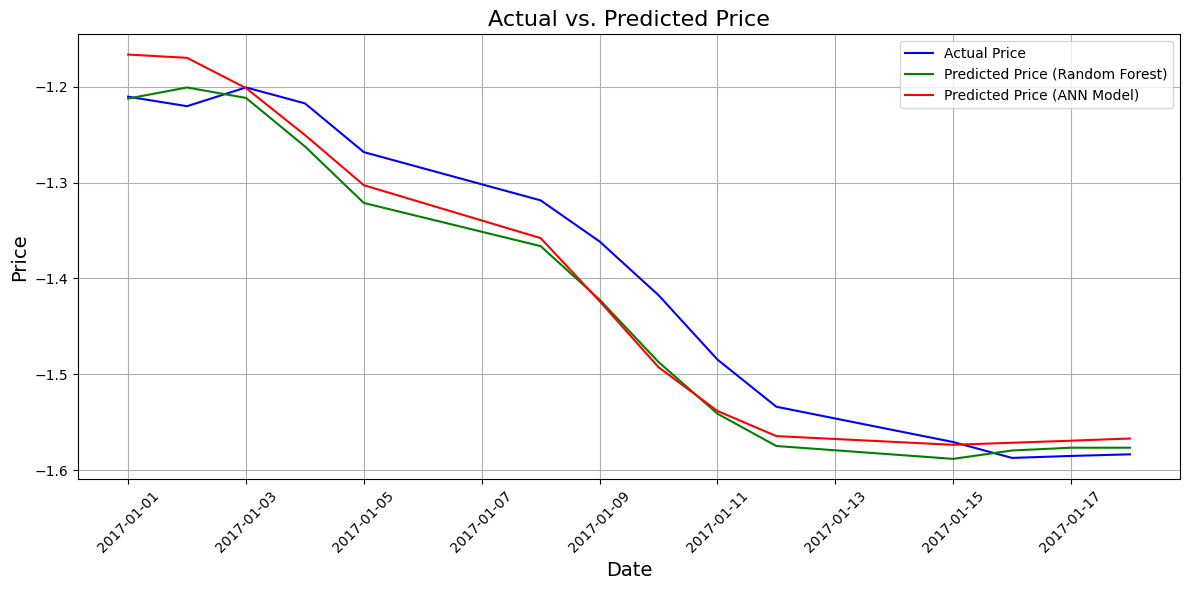

In [193]:
test_date_index = STC_DTA.index[-len(y_test_stc):]


plot_actual_vs_predicted(
    index=test_date_index,
    y_test=y_test_stc,
    tst_prd_dt=prd_rf_stc_tst,
    test_pred_cnn=y_pred_tst_stc
)

In [194]:
def plot_model_metrics_comparison(y_test, tst_prd_dt, test_pred_cnn, model_names=['a', 'b']):

    # Create a dictionary to store the metrics for each model
    metrics_data = {
        model_names[0]: {
            'MAE': mean_absolute_error(y_test,tst_prd_dt),
            'MSE': mean_squared_error(y_test,tst_prd_dt),
            'RMSE': nmy.sqrt(mean_squared_error(y_test,tst_prd_dt)),
            'MAPE': nmy.mean(nmy.abs((y_test - tst_prd_dt) / y_test)),
            'R2': r2_score(y_test,tst_prd_dt)
        },
        model_names[1]: {
            'MAE': mean_absolute_error(y_test,test_pred_cnn.flatten()),
            'MSE': mean_squared_error(y_test,test_pred_cnn.flatten()),
            'RMSE': nmy.sqrt(mean_squared_error(y_test, test_pred_cnn.flatten())),
            'MAPE': nmy.mean(nmy.abs((y_test - test_pred_cnn.flatten()) / y_test)),
            'R2': r2_score(y_test,test_pred_cnn.flatten())
        }
    }

    # Create a list of metrics
    metrics = ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2']

    # Construct a figure with bar graph axes.
    fig, ax=matlp.subplots(figsize=(10, 6))

    # Specify the bars' width.
    bar_width=0.35

    # Calculating the x-axis positions for the bars
    x=nmy.arange(len(metrics))

    # Plot the bars for each model
    rects1 = ax.bar(x - bar_width / 2, [metrics_data[model_names[0]][metric] for metric in metrics],
                    width=bar_width, label=model_names[0], color='green')
    rects2 = ax.bar(x + bar_width / 2, [metrics_data[model_names[1]][metric] for metric in metrics],
                    width=bar_width, label=model_names[1], color='red')

    # Set the x-axis tick labels
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)

    # Set the title and axis labels
    ax.set_title(f'Comparison of {model_names[0]} and {model_names[1]} Model Performance')
    ax.set_ylabel('Metric Value')

    # Add a legend
    ax.legend()

    # Add grid lines for clarity
    ax.grid(True, linestyle='--', alpha=0.7)

    # Labelling the result values above the bars.
    def autolabel(rects):
        # applying the looping the values
        for rect in rects:
            # getting the values of heiht
            height = rect.get_height()
            # showing the values of graph
            ax.annotate(f'{height:.2f}',
                        # Setting the position of the annotation text
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        # Setting the horizontal alignment of the text
                        xytext=(0, 3),
                        # Specify that the offset is in points relative to the original position
                        textcoords="offset points",
                        # Setting the color of the annotation text
                        ha='center',va='bottom',fontsize=8)

    autolabel(rects1)
    autolabel(rects2)

    #Make sure the plot is visible and the layout is tight.
    matlp.tight_layout()
    matlp.show()

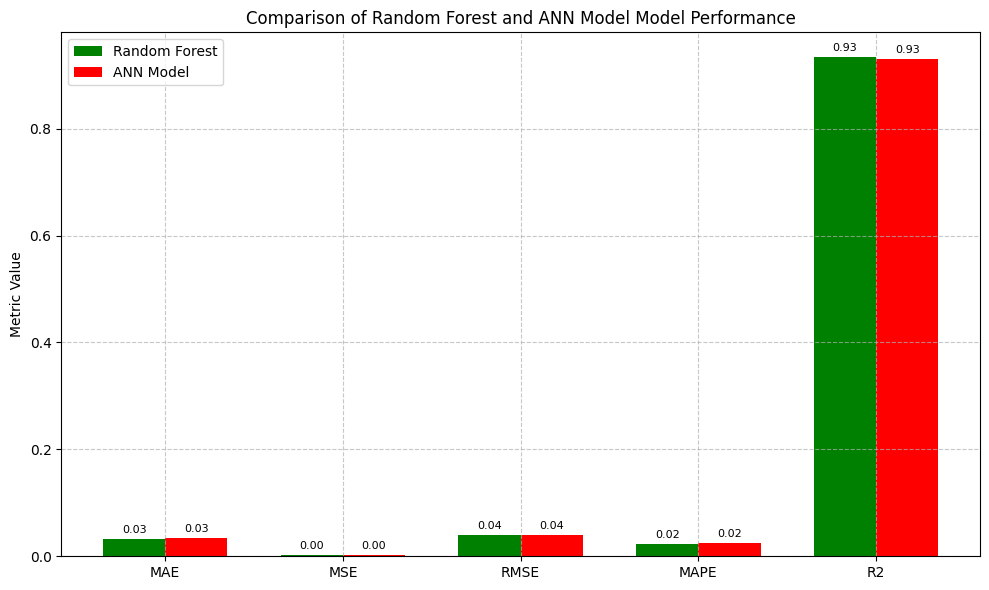

In [195]:
plot_model_metrics_comparison(
    y_test=y_test_stc,
    tst_prd_dt=prd_rf_stc_tst,
    test_pred_cnn=y_pred_tst_stc,
    model_names=['Random Forest', 'ANN Model'])